In [ ]:
import json
import os
import pandas as pd

PROJECT_ROOT_DIR = '.'
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "DA_data")
TRAINING_PATH = os.path.join(DATA_PATH,"training")
TEST_PATH = os.path.join(DATA_PATH, "testing")



In [ ]:
json_files = os.listdir(TRAINING_PATH)
sensor_values_rows = []
dataF = pd.DataFrame(columns=['station1', 'station2','station3','station4','station5','signature','label'])

for json_file in json_files:
    with open((TRAINING_PATH+"/"+json_file), 'r') as f:
        data = json.load(f)
        label = json_file[:3]
        signature = data['signature']

        for value in data['payload']['values']:

            dataF.loc[len(dataF)] = [value[0], value[1],value[2],value[3],value[4],signature, label]
            
dataF.to_csv("data-train.csv")

    


In [ ]:
json_files = os.listdir(TEST_PATH)
sensor_values_rows = []
dataF = pd.DataFrame(columns=['station1', 'station2','station3','station4','station5','signature','label'])

for json_file in json_files:
    with open((TEST_PATH+"/"+json_file), 'r') as f:
        data = json.load(f)
        label = json_file[:3]
        signature = data['signature']

        for value in data['payload']['values']:

            dataF.loc[len(dataF)] = [value[0], value[1],value[2],value[3],value[4],signature, label]
            
dataF.to_csv("data-test.csv")

    


## Acquiring data

In [ ]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import signal
import numpy as np
data = pd.read_csv("data-train.csv")
data = data.drop('Unnamed: 0', axis=1)
data = data.drop('signature', axis=1)
data.head()
df = data.copy()
df_avg = data.copy()


In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df)

In [ ]:
df_by_labels= {}
x = df_avg.groupby('label').label.count()
for label in x.index:
    df_by_labels[label] = (df_avg.loc[df.label==label])

In [ ]:
coordinates = {'station1': (13.64, 1.90),
                'station2': (9.31, 4.09),
                'station3': (4.50, 4.59),
                'station4': (6.05, 0.15),
                'station5': (0.29, 4.42),
                '0,0': (14.14, 0),
                '1,0': (12.28, 0),
                '2,0': (10.42, 0),
                '3,0': (8.56, 0),
                '4,0': (6.7, 0),
                '5,0': (4.84, 0),
                '6,0': (2.98, 0),
                '7,0': (1.12, 0),
                '0,1': (14.14, 2),
                '1,1': (12.28, 2),
                '2,1': (10.42, 2),
                '3,1': (8.56, 2),
                '4,1': (6.7, 2),
                '5,1': (4.84, 2),
                '6,1': (2.98, 2),
                '7,1': (1.12, 2),
                '0,2': (14.14, 4),
                '1,2': (12.28, 4),
                '2,2': (10.42, 4),
                '3,2': (8.56, 4),
                '4,2': (6.7, 4),
                '5,2': (4.84, 4),
                '6,2': (2.98, 4),
                '7,2': (1.12, 4),
                '1,3': (12.28, 6),
                '2,3': (10.42, 6),}


#Dataframe to fill with coordinates

df_avg['x'] = df_avg['label']
df_avg['y'] = df_avg['label']
df_avg = df_avg.drop('label', axis=1)

df_avg['x'] = df_avg.x.map(lambda x: coordinates[x][0])
df_avg['y'] = df_avg.y.map(lambda x: coordinates[x][1])


<Axes: ylabel='station1'>

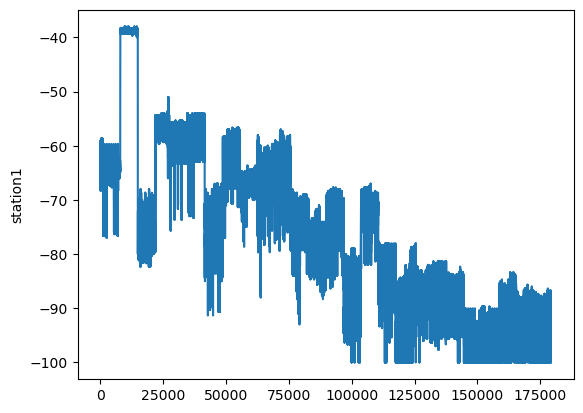

In [9]:
sns.lineplot(data=df.station1)

In [11]:
TW = 20
NX = 2
df_avg.station1 = df.station1.rolling(TW, min_periods=NX).mean()
df_avg.station2 = df.station2.rolling(TW, min_periods=NX).mean()
df_avg.station3 = df.station3.rolling(TW, min_periods=NX).mean()
df_avg.station4 = df.station4.rolling(TW, min_periods=NX).mean()
df_avg.station5 = df.station5.rolling(TW, min_periods=NX).mean()


In [ ]:
sns.relplot(data=df_avg, x='x', y='station1', hue='station1', col='y')
sns.relplot(data=df_avg, x='x', y='station2', hue='station2', col='y')

In [21]:
df_station1 = df_avg.drop(['station2' ,'station3', 'station4', 'station5'], axis=1)
df_station1['rssi'] = df_avg.station1
df_station1 = df_station1.drop('station1', axis=1)

df_station2 = df_avg.drop(['station1' ,'station3', 'station4', 'station5'], axis=1)
df_station2['rssi'] = df_avg.station2
df_station2 = df_station2.drop('station2', axis=1)

df_station3 = df_avg.drop(['station1' ,'station2', 'station4', 'station5'], axis=1)
df_station3['rssi'] = df_avg.station3
df_station3 = df_station3.drop('station3', axis=1)

df_station4 = df_avg.drop(['station1' ,'station2', 'station3', 'station5'], axis=1)
df_station4['rssi'] = df_avg.station4
df_station4 = df_station4.drop('station4', axis=1)

df_station5 = df_avg.drop(['station1' ,'station2', 'station3', 'station4'], axis=1)
df_station5['rssi'] = df_avg.station5
df_station5 = df_station5.drop('station5', axis=1)

concat = pd.concat([df_station1.assign(station='station1'),
                    df_station2.assign(station='station2'),
                    df_station3.assign(station='station3'),
                    df_station4.assign(station='station4'), 
                    df_station5.assign(station='station5')], ignore_index=True)


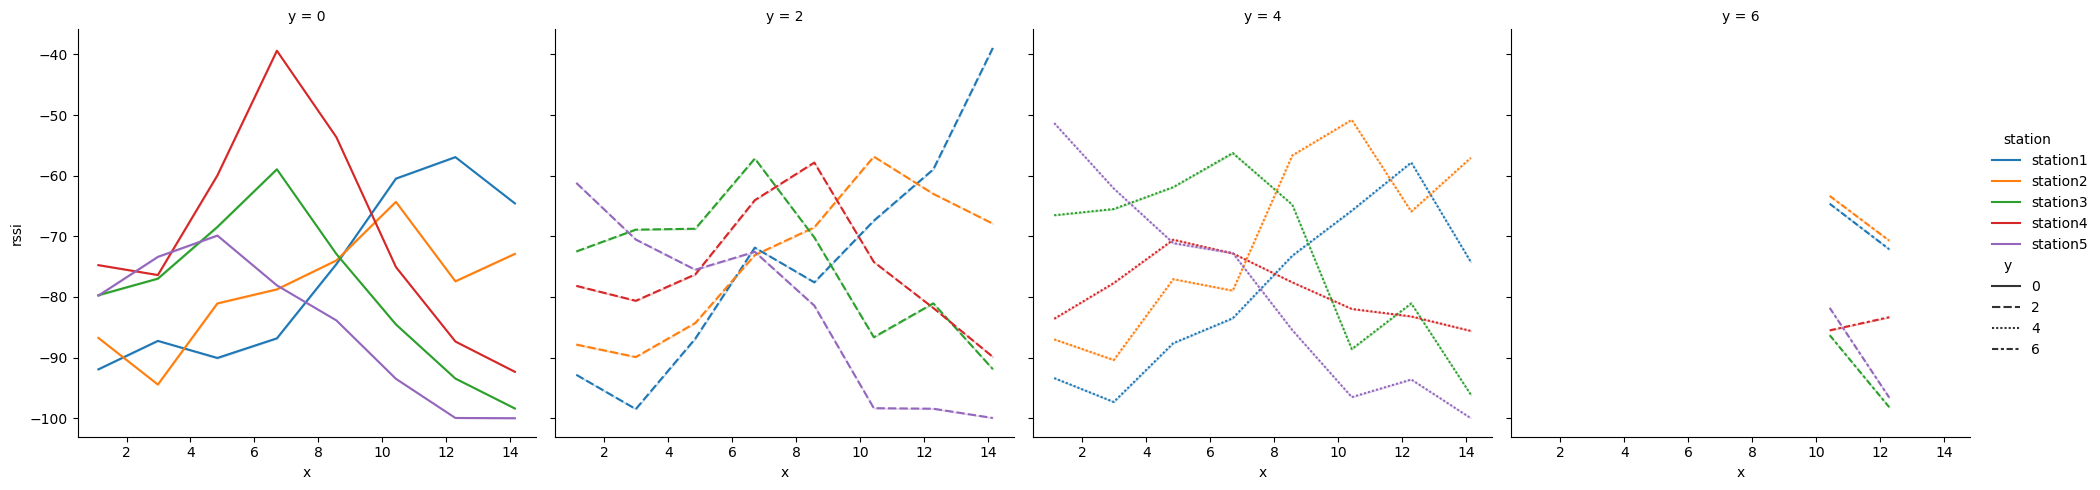

In [25]:
plt.figure(figsize=(16,6))

sns.relplot(data=concat, x='x', y='rssi', hue='station', kind='line', style='y')